
# Predições de Imagem para o dataset IMDB

Este Notebook consiste em carregar a base do imdb na rede WiseResnet, com o intuito de 
analisar as predições da mesma utilizando a base Wiki, Estipulando o gênero das pessoas e suas idades APARENTES.
Sendo assim, com o auxilio de determinadas bibliotecas como Numpy e matplotlib podemos fazer uma análise mais aprimorada dos dados.






In [4]:
%matplotlib inline

In [6]:
import cv2  
import numpy as np 
import matplotlib.pyplot as plt 
from wide_resnet import WideResNet
from utils import get_meta


#### Carregando a Base
 - Usando as determinadas importações podemos carregar o dataset e as demais variáveis para a manipulação dos dados




In [12]:
path_root = 'wiki_crop/' #Pasta principal
cols, rows = 4, 3 #Numero de Colunas e linhas a serem exibidas
img_num = cols * rows #Número de Imagens
model = WideResNet(64,16,8)() #(Resolução das imagens, Profundidade da rede, Fator Multiplicativo - Quant. Kernels)
model.load_weights('checkpoints/imdbase/weights.29-3.75.hdf5') #Carregar os pesos pré-treinados no IMDB dataset  
mat_path = str(path_root+'wiki.mat') #Caminho do arquivo .mat

ok


In [13]:
full_path, dob, gender, photo_taken, face_score, second_face_score, age\
    = get_meta(mat_path, 'wiki') # Carregar base do Wiki

In [14]:
print(full_path[0][0]) #Caminho da primeira Imagem

17/10000217_1981-05-05_2009.jpg


### Metodos auxiliares
- Com os metodos abaixo podemos exibir lote de imagens e fazer as predições correspodentes 

In [24]:
def prediction(img):
    img = cv2.resize(img,(64,64))
    img = np.expand_dims(np.array(img),axis = 0)
    result = model.predict(img)
    ages = np.arange(0, 101).reshape(101, 1)
    age_pred = result[1].dot(ages).flatten()
    gender_pred = result[0]
    if gender_pred[0][0] < 0.5:
        gender_pred = 'Homem'
    else:
        gender_pred = 'Mulher'    

    return str(gender_pred+'|'+str((int(age_pred))))
    
    
def show_imgs(img_paths):
  
    img_ids = np.random.choice(len(img_paths), img_num, replace=False)
    for i, img_id in enumerate(img_ids):
        plt.subplot(rows, cols, i + 1)
        img = cv2.imread(path_root + str(img_paths[img_id]))
        plt.title(str(prediction(img)))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    
    plt.show()


### Filtragem da Base Wiki 
- Agora iremos filtrar as inconsistências na base Wiki para fazer o predict na mesma

In [23]:
img_paths = []    

for i in range(len(face_score)):
    if face_score[i] >= 1.0 and np.isnan(second_face_score[i]):    
        img_paths.append(full_path[i][0])

print("#Imagens com confiança (valor de detecção de Face) >= que 1.0 e sem segundo rosto na imagem: {}".format(len(img_paths)))

#Imagens com confiança (valor de detecção de Face) >= que 1.0 e sem segundo rosto na imagem: 38923


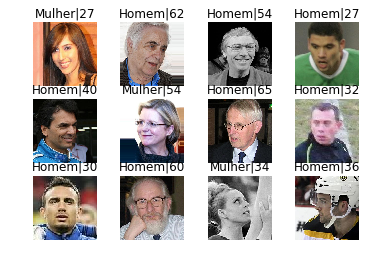

In [33]:
show_imgs(img_paths)      